#### Ques 1 : Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

c:\Users\sreej\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\sreej\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# loading the data
Laying_data = pd.read_csv('./Combined/Train/Laying/Subject_1.csv')
Sitting_data = pd.read_csv('./Combined/Train/Sitting/Subject_1.csv')
Standing_data = pd.read_csv('./Combined/Train/Standing/Subject_1.csv')
Walking_data = pd.read_csv('./Combined/Train/Walking/Subject_1.csv')
WalkingDownStairs_data = pd.read_csv('./Combined/Train/Walking_DownStairs/Subject_1.csv')
WalkingUpStairs_data = pd.read_csv('./Combined/Train/Walking_UpStairs/Subject_1.csv')


# creating dictionary to hold the data for each activity
activity_data = {
    'Laying' : Laying_data,
    'Sitting' : Sitting_data,
    'Standing' : Standing_data,
    'Walking' : Walking_data,
    'Walking DownStairs' : WalkingDownStairs_data,
    'Walking UpStairs' : WalkingUpStairs_data
}


print(Laying_data.head())


       accx      accy      accz
0  0.181141  0.787813  0.581194
1  0.180389  0.788230  0.584017
2  0.184572  0.788880  0.580620
3  0.187104  0.788494  0.574279
4  0.186461  0.786544  0.570184


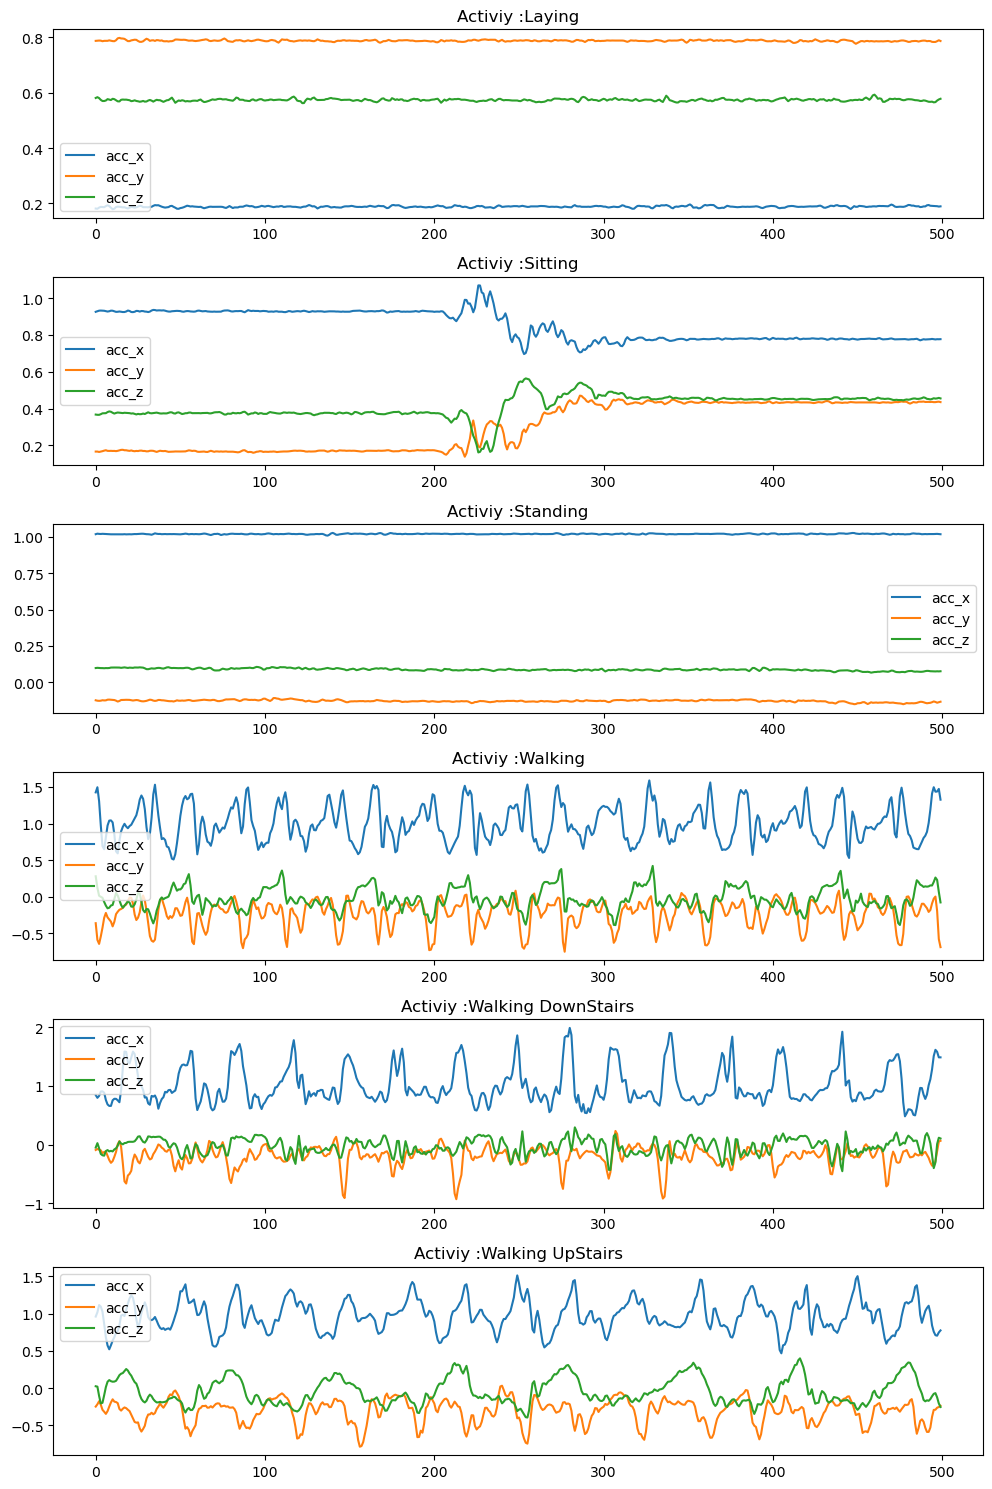

In [9]:
# ploting the wave form
fig, axes = plt.subplots(len(activity_data), 1, figsize = (10, 15))

for i, (activity, data) in enumerate(activity_data.items()):
    axes[i].plot(data['accx'][:500], label='acc_x')
    axes[i].plot(data['accy'][:500], label='acc_y')
    axes[i].plot(data['accz'][:500], label='acc_z')

    axes[i].set_title(f'Activiy :{activity}')
    axes[i].legend()

# adjust layout for better visibility
plt.tight_layout()
plt.show()

#### Static Activity : Sitting, Standing and Laying all have relatively flat waveform since there is minimal movement, so the acceration value over time remain constant over time 
#### Dynamic Activity : Walking, Walking upstair, Walking Downstair all have oscillating waveform because the object is in continous motion 

#### Yes, the model should be able to classify activities based on the data (Static Activity have majorly flat waveform whereas the Dynamic Activity have majorly oscillating waveform)